# Import Libs and Read Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import squarify

In [5]:
data = pd.read_csv('Groceries_dataset.csv')
data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [6]:
data.Date = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

# EDA

In [7]:
data.head()

Member_number       Date   itemDescription  year  month  day  day_of_week
0           1808 2015-07-21    tropical fruit  2015      7   21            1
1           2552 2015-05-01        whole milk  2015      5    1            4
2           2300 2015-09-19         pip fruit  2015      9   19            5
3           1187 2015-12-12  other vegetables  2015     12   12            5
4           3037 2015-01-02        whole milk  2015      1    2            4

## Best & Least Sellers

In [8]:
data['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
frozen chicken              5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

Text(0.5, 1.0, 'Best Sellers')

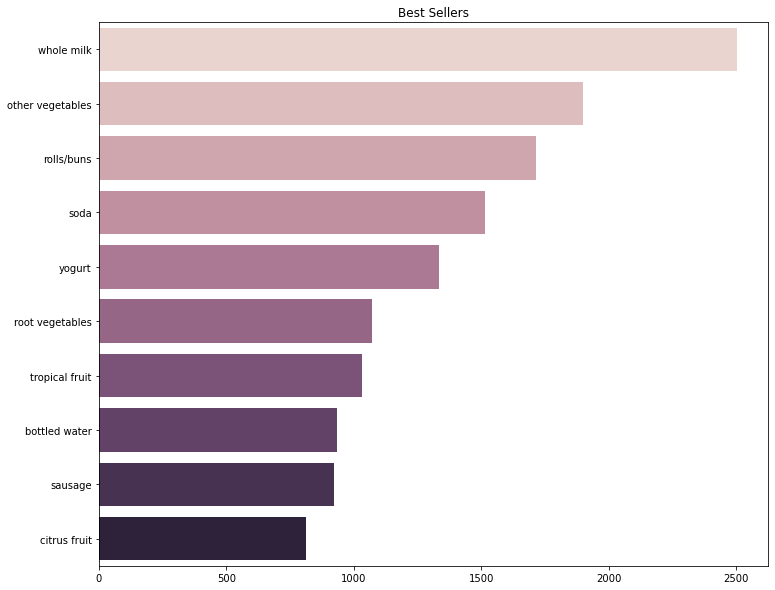

In [9]:
x = list(data['itemDescription'].value_counts()[:10].values)
y = list(data['itemDescription'].value_counts()[:10].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers')

Text(0.5, 1.0, 'Least Sellers')

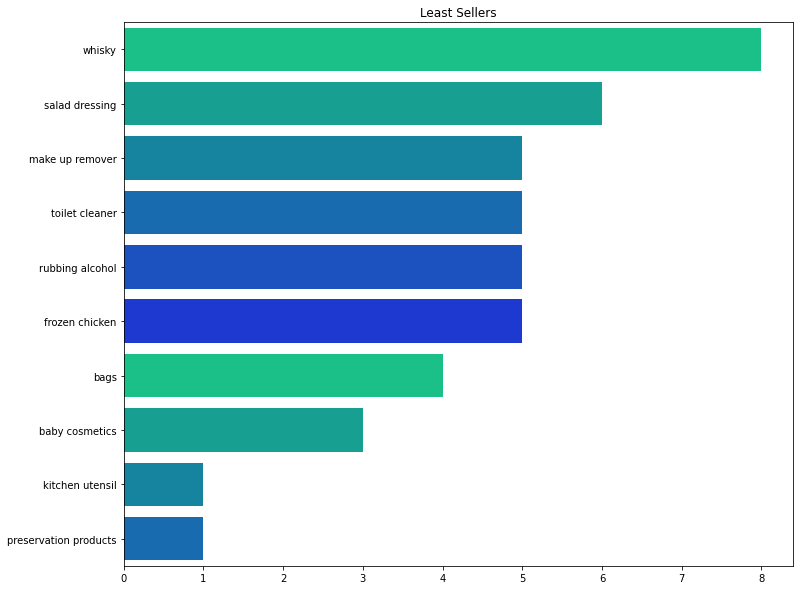

In [10]:
x = list(data['itemDescription'].value_counts()[-10:].values)
y = list(data['itemDescription'].value_counts()[-10:].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers')

## Best & Least Sellers by year

In [11]:
data_year = data.groupby('year')

In [12]:
data_year['itemDescription'].agg(['count'])

count
year       
2014  18277
2015  20488

### 2014

In [13]:
data_year2014 = data[data['year']==2014]
data_year2014['itemDescription'].value_counts()

whole milk               1038
other vegetables          859
rolls/buns                837
soda                      777
yogurt                    640
                         ... 
frozen chicken              2
bags                        1
preservation products       1
kitchen utensil             1
baby cosmetics              1
Name: itemDescription, Length: 167, dtype: int64

Text(0.5, 1.0, 'Best Sellers(2014)')

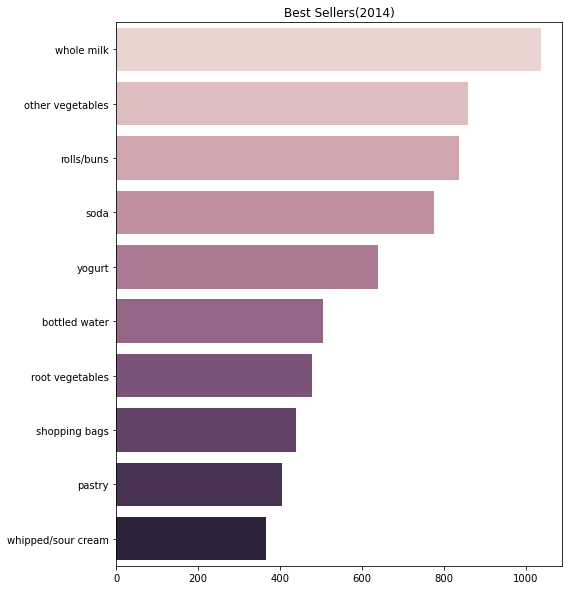

In [14]:
x = list(data_year2014['itemDescription'].value_counts()[:10].index)
y = list(data_year2014['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2014)')

Text(0.5, 1.0, 'Least Sellers(2014)')

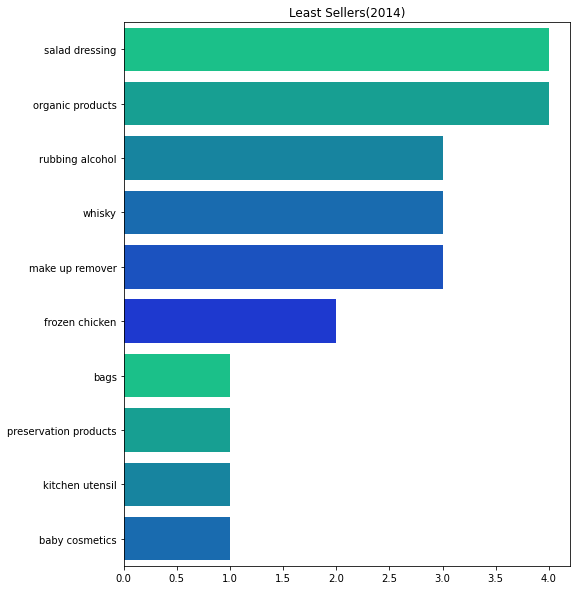

In [15]:
x = list(data_year2014['itemDescription'].value_counts()[-10:].index)
y = list(data_year2014['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x,palette=sns.color_palette("winter_r"))
plt.title('Least Sellers(2014)')

### 2015

In [16]:
data_year2015 = data[data['year']==2015]
data_year2015['itemDescription'].value_counts()

whole milk              1464
other vegetables        1039
rolls/buns               879
sausage                  744
soda                     737
                        ... 
make up remover            2
rubbing alcohol            2
baby cosmetics             2
salad dressing             2
specialty vegetables       1
Name: itemDescription, Length: 164, dtype: int64

Text(0.5, 1.0, 'Best Sellers(2015)')

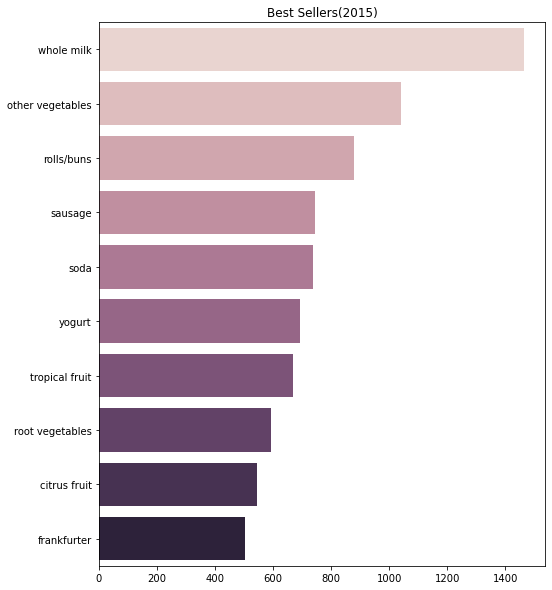

In [17]:
x = list(data_year2015['itemDescription'].value_counts()[:10].index)
y = list(data_year2015['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2015)')

Text(0.5, 1.0, 'Least Sellers(2015)')

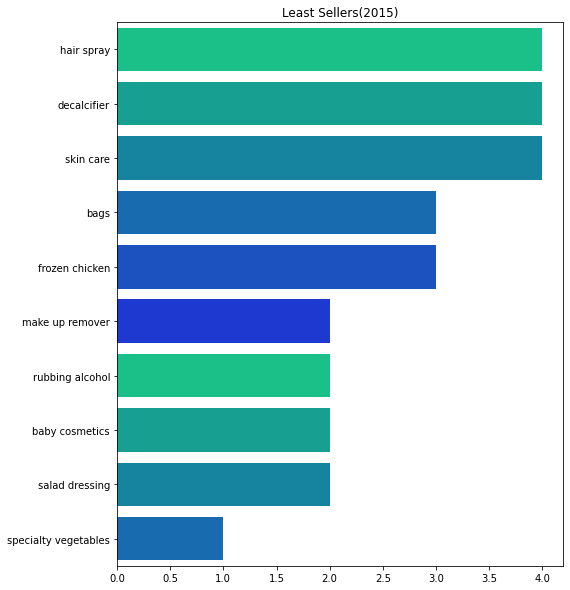

In [18]:
x = list(data_year2015['itemDescription'].value_counts()[-10:].index)
y = list(data_year2015['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers(2015)')

## General Information

In [19]:
fig = px.sunburst(data, path=['year', 'month', 'day_of_week'],title="Dont Forget to Click Chart to Examine Deeply ")
fig.show()

## Item Descriptions

In [20]:
targets = list(dict(data['itemDescription'].value_counts()).keys())
values = list(dict(data['itemDescription'].value_counts()).values())

fig = px.pie(
    values=values, 
    names=targets,
    title='Item Descriptions',
    color_discrete_sequence=['darkcyan', 'lawngreen']
)
fig.show()

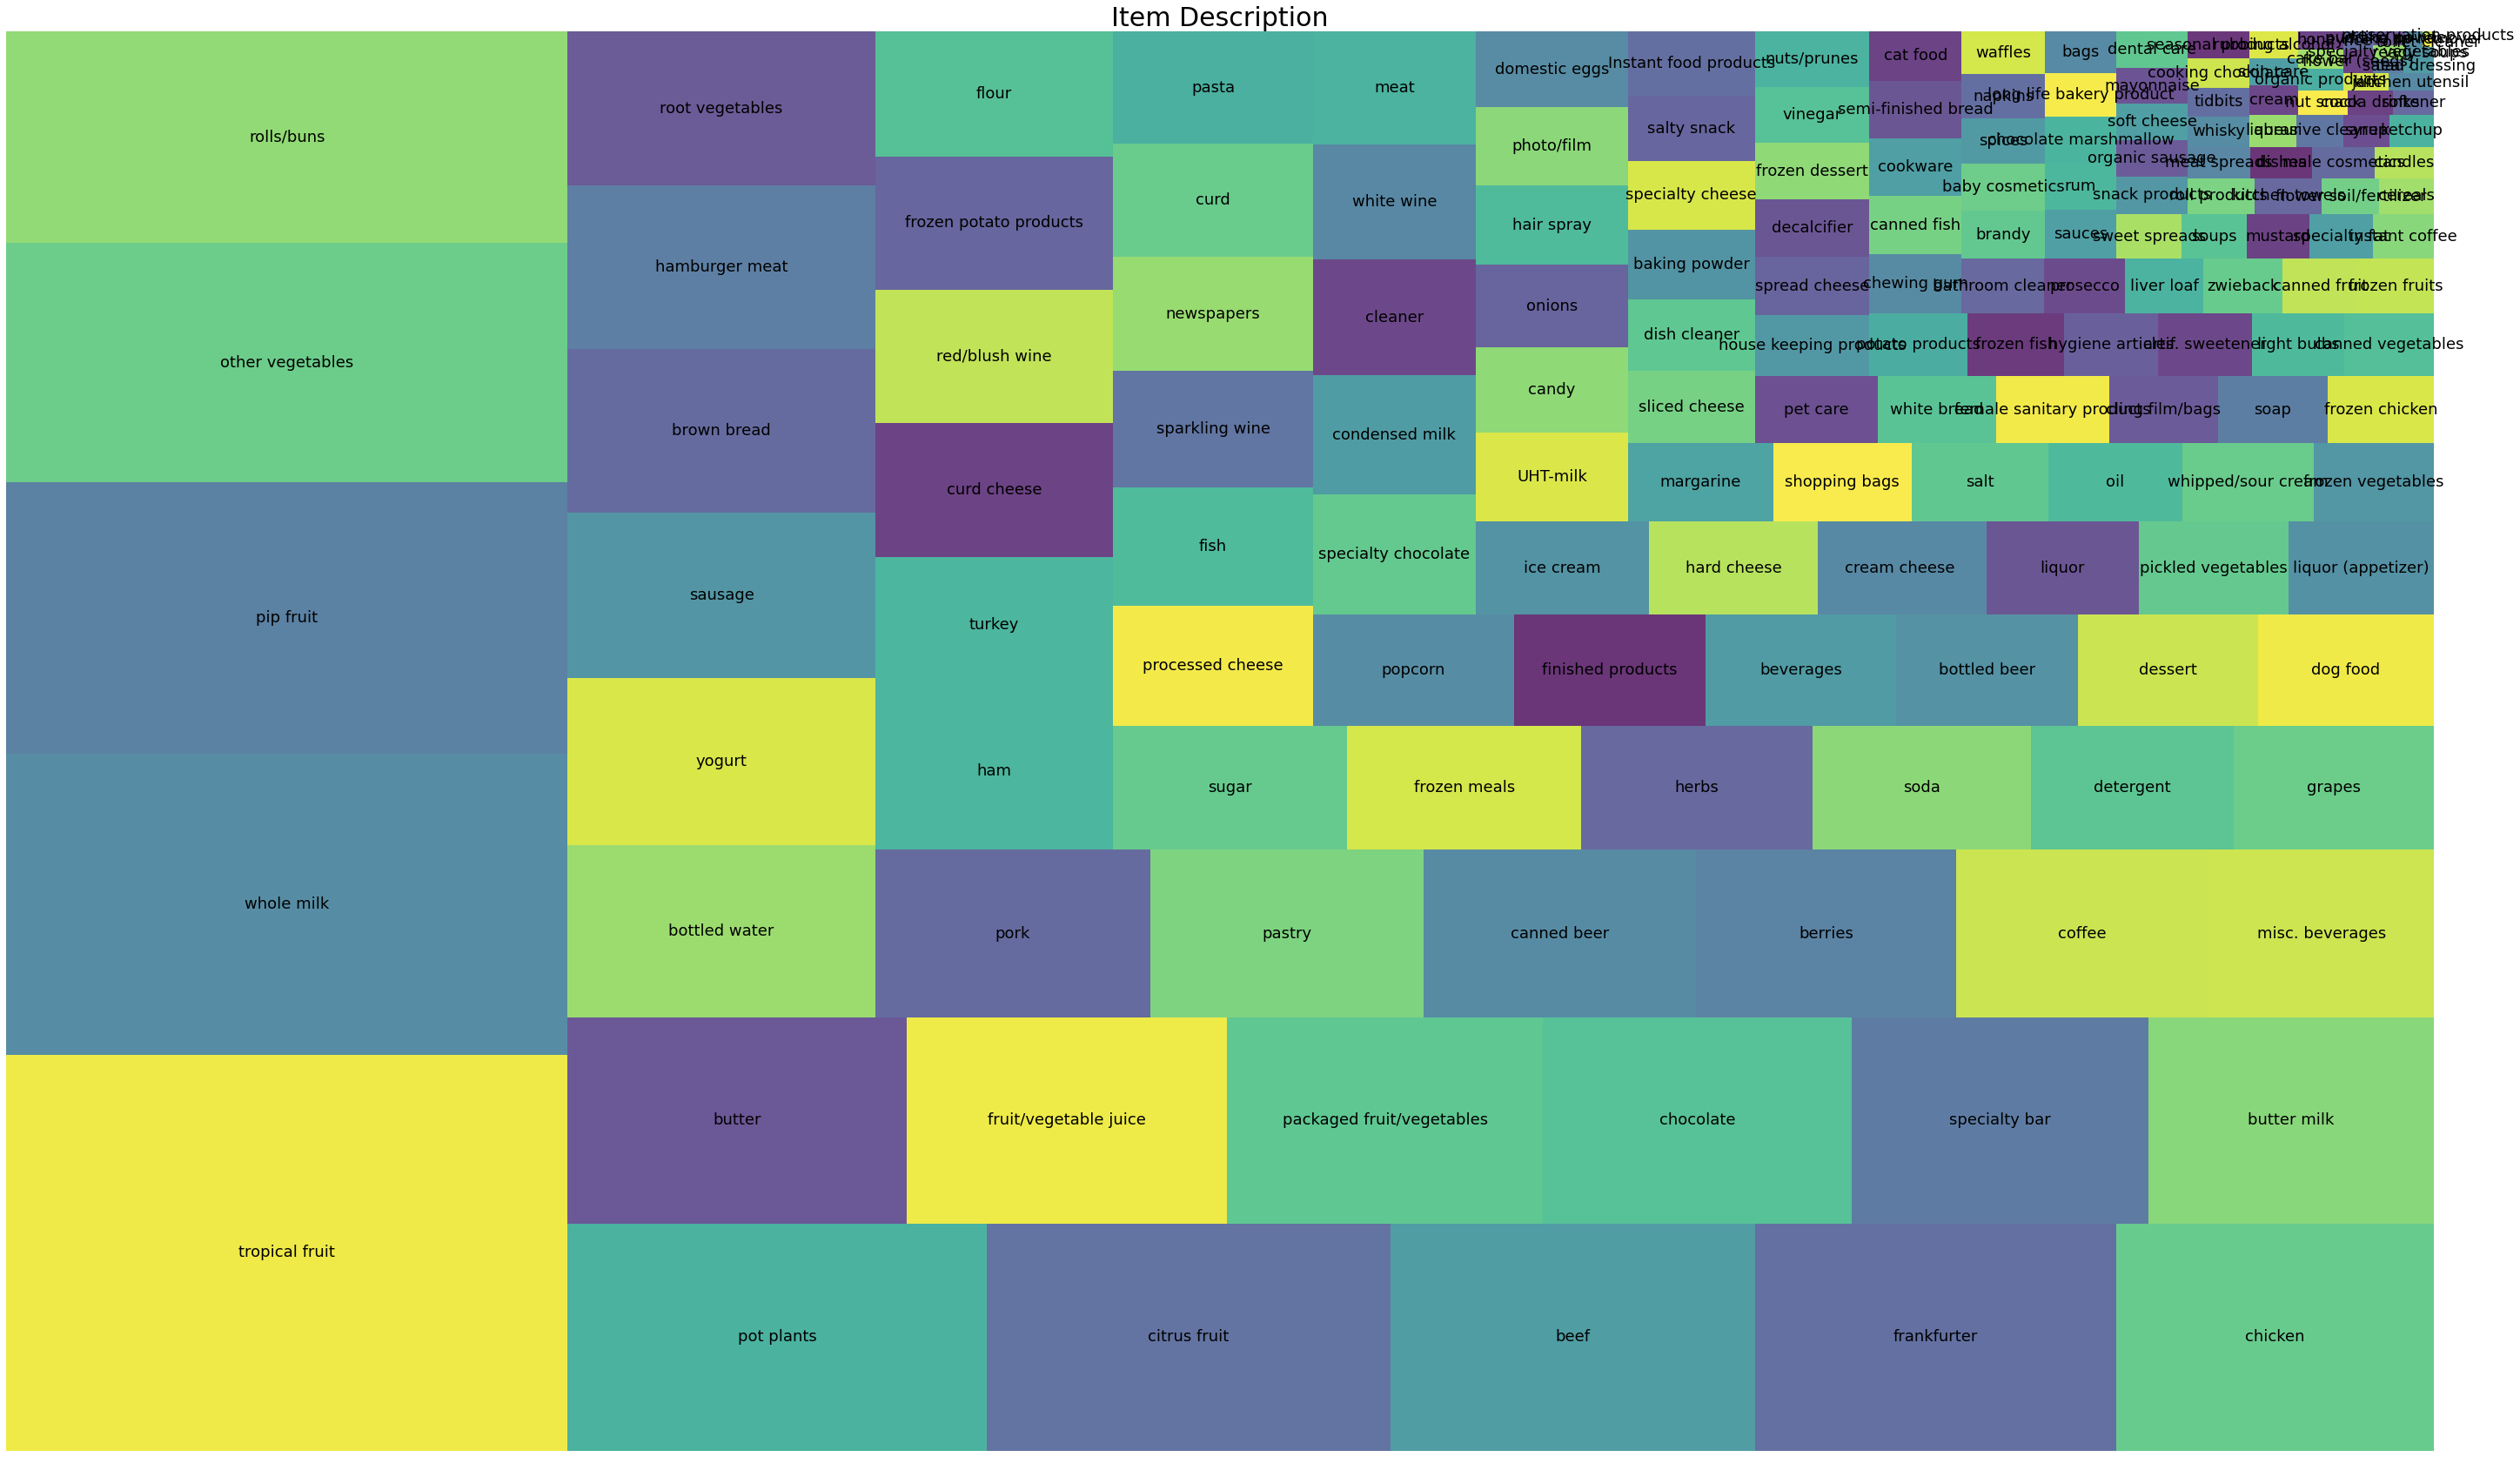

In [21]:
plt.figure(figsize = (50, 30))
squarify.plot(sizes = data.itemDescription.value_counts().values, alpha = 0.8,
              label = data.itemDescription.unique(), text_kwargs={'fontsize':18})
plt.title('Item Description', fontsize = 30)
plt.axis('off')
plt.show()

(-0.5, 511.5, 383.5, -0.5)

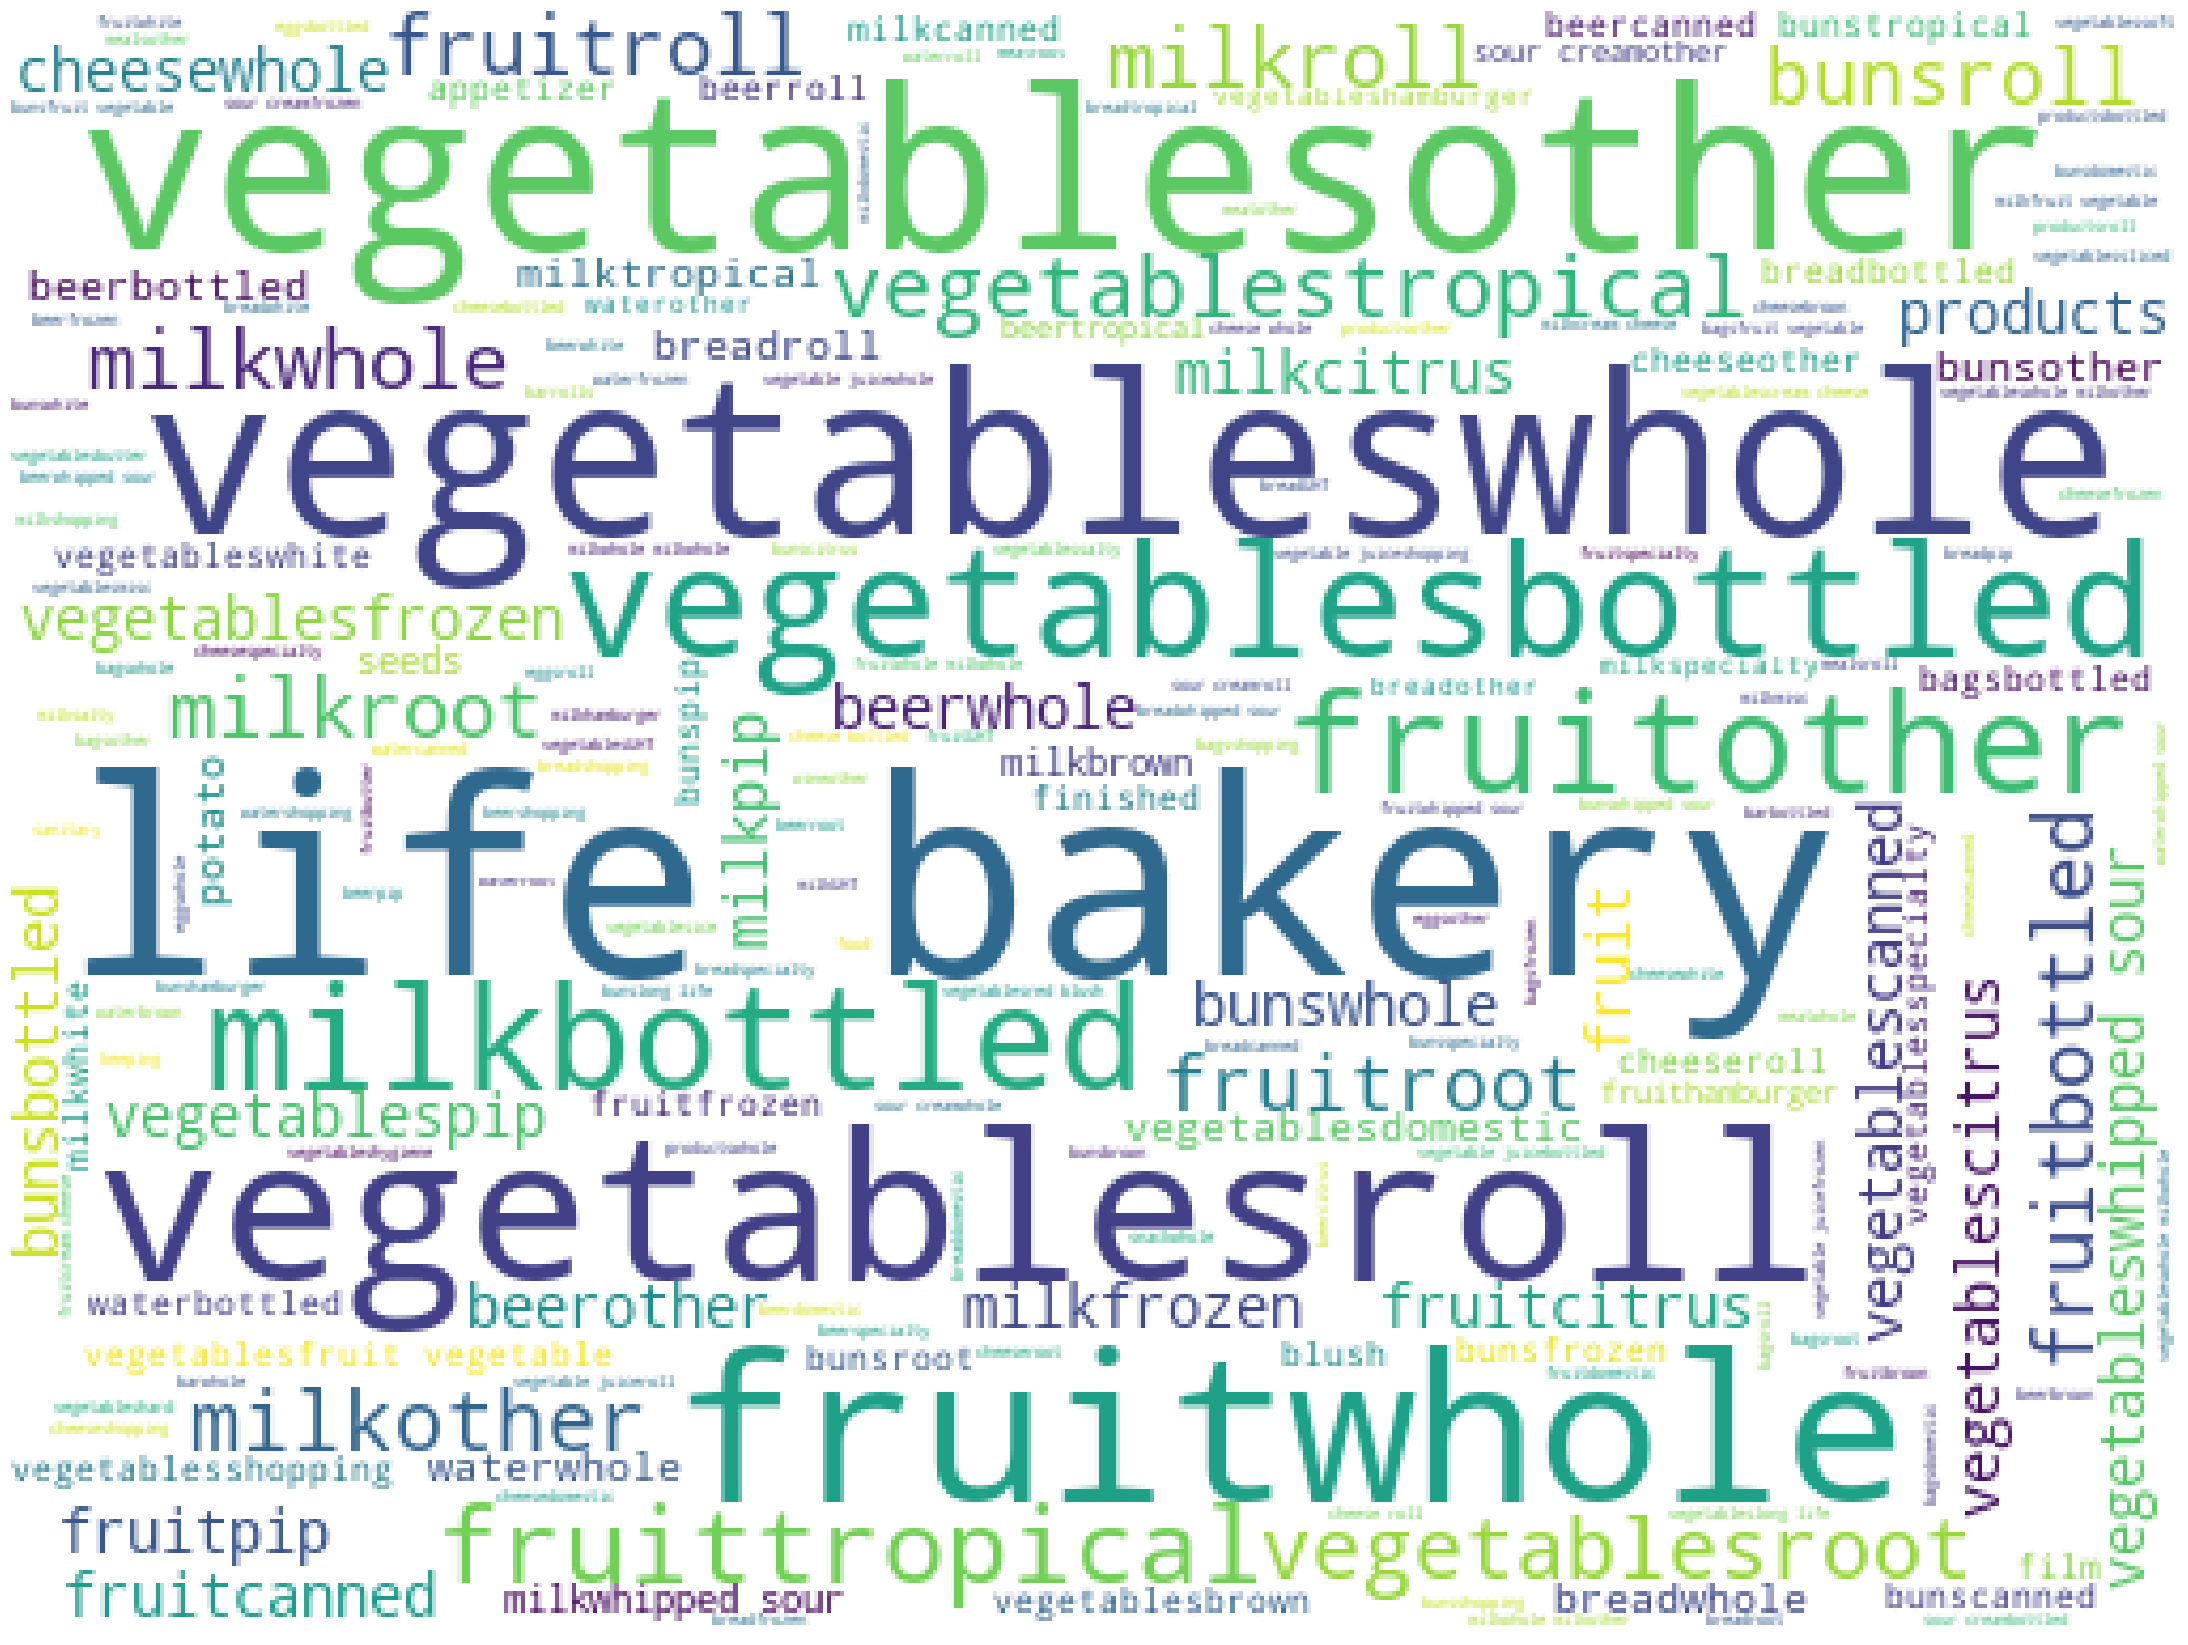

In [22]:
plt.subplots(figsize=(50,30))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(data['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

# Apriori

https://github.com/ymoch/apyori

In [23]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=df1acac0f232f350120d1d38f655bd873ffdca94ed7fa7d2937ff95b3792690d
  Stored in directory: c:\users\senol\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [24]:
from apyori import apriori

In [26]:
apriori_data = pd.read_csv('Groceries_dataset.csv')
apriori_data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

convert link : https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

In [27]:
apriori_data = apriori_data.groupby(['Member_number','Date'])['itemDescription'].apply(','.join).reset_index()
apriori_data

Member_number        Date  \
0               1000  15-03-2015   
1               1000  24-06-2014   
2               1000  24-07-2015   
3               1000  25-11-2015   
4               1000  27-05-2015   
...              ...         ...   
14958           4999  24-01-2015   
14959           4999  26-12-2015   
14960           5000  09-03-2014   
14961           5000  10-02-2015   
14962           5000  16-11-2014   

                                         itemDescription  
0          sausage,whole milk,semi-finished bread,yogurt  
1                          whole milk,pastry,salty snack  
2                            canned beer,misc. beverages  
3                               sausage,hygiene articles  
4                                soda,pickled vegetables  
...                                                  ...  
14958  tropical fruit,berries,other vegetables,yogurt...  
14959                                bottled water,herbs  
14960                       fruit/vegetable juice,onions  
14961           soda,root vegetables,semi-finished bread  
14962                      bottled beer,other vegetables  

[14963 rows x 3 columns]

In [28]:
item_list = []
for i in range(apriori_data.shape[0]):
    item_list.append([apriori_data.itemDescription[i]])

In [29]:
item_list

[['sausage,whole milk,semi-finished bread,yogurt'],
 ['whole milk,pastry,salty snack'],
 ['canned beer,misc. beverages'],
 ['sausage,hygiene articles'],
 ['soda,pickled vegetables'],
 ['frankfurter,curd'],
 ['sausage,whole milk,rolls/buns'],
 ['whole milk,soda'],
 ['beef,white bread'],
 ['frankfurter,soda,whipped/sour cream'],
 ['frozen vegetables,other vegetables'],
 ['butter,whole milk'],
 ['tropical fruit,sugar'],
 ['butter milk,specialty chocolate'],
 ['sausage,rolls/buns'],
 ['root vegetables,detergent'],
 ['frozen meals,dental care'],
 ['rolls/buns,rolls/buns'],
 ['dish cleaner,cling film/bags'],
 ['canned beer,frozen fish'],
 ['other vegetables,hygiene articles'],
 ['pip fruit,whole milk,tropical fruit'],
 ['rolls/buns,red/blush wine,chocolate'],
 ['other vegetables,shopping bags'],
 ['whole milk,chocolate,packaged fruit/vegetables,rolls/buns'],
 ['root vegetables,whole milk,pastry'],
 ['rolls/buns,rolls/buns'],
 ['whipped/sour cream,margarine'],
 ['bottled water,softener,rolls/

In [30]:
rules = apriori(item_list, min_support = 0.0001, min_confidence= 0.0001)

In [31]:
list_rules = list(rules)
print(len(list_rules))

1800


In [32]:
list_rules[0]

RelationRecord(items=frozenset({'Instant food products,pip fruit'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Instant food products,pip fruit'}), confidence=0.00013366303548753594, lift=1.0)])

In [33]:
results = []
for item in list_rules:
        pair = item[0]
        items = [x for x in pair]
        
        value_0 = str(items[0])
        value_1 = str(item[1])[:7]
        value_2 = str(item[2][0][2])[:7]
        value_3 = str(item[2][0][3])[:7]
        
        rows = (value_0, value_1, value_2, value_3)
        results.append(rows)
        
        col_names = ['Title_1','Support','Confidence','Lift']
        
        storage = pd.DataFrame.from_records(results,columns=col_names)
        
        print(storage)
        print(' ')

                           Title_1  Support Confidence Lift
0  Instant food products,pip fruit  0.00013    0.00013  1.0
 
                           Title_1  Support Confidence Lift
0  Instant food products,pip fruit  0.00013    0.00013  1.0
1     Instant food products,yogurt  0.00013    0.00013  1.0
 
                           Title_1  Support Confidence Lift
0  Instant food products,pip fruit  0.00013    0.00013  1.0
1     Instant food products,yogurt  0.00013    0.00013  1.0
2                 UHT-milk,berries  0.00013    0.00013  1.0
 
                           Title_1  Support Confidence Lift
0  Instant food products,pip fruit  0.00013    0.00013  1.0
1     Instant food products,yogurt  0.00013    0.00013  1.0
2                 UHT-milk,berries  0.00013    0.00013  1.0
3               UHT-milk,beverages  0.00013    0.00013  1.0
 
                           Title_1  Support Confidence Lift
0  Instant food products,pip fruit  0.00013    0.00013  1.0
1     Instant food products,yogu

21                        beef,beef  0.00013    0.00013  1.0
 
                            Title_1  Support Confidence Lift
0   Instant food products,pip fruit  0.00013    0.00013  1.0
1      Instant food products,yogurt  0.00013    0.00013  1.0
2                  UHT-milk,berries  0.00013    0.00013  1.0
3                UHT-milk,beverages  0.00013    0.00013  1.0
4             UHT-milk,bottled beer  0.00013    0.00013  1.0
5            UHT-milk,bottled water  0.00020    0.00020  1.0
6              UHT-milk,brown bread  0.00013    0.00013  1.0
7            UHT-milk,cream cheese   0.00020    0.00020  1.0
8            UHT-milk,domestic eggs  0.00013    0.00013  1.0
9                UHT-milk,margarine  0.00013    0.00013  1.0
10        UHT-milk,other vegetables  0.00046    0.00046  1.0
11               UHT-milk,pip fruit  0.00013    0.00013  1.0
12              UHT-milk,rolls/buns  0.00033    0.00033  1.0
13           UHT-milk,shopping bags  0.00020    0.00020  1.0
14                    

44    beef,long life bakery product  0.00013    0.00013  1.0
 
                            Title_1  Support Confidence Lift
0   Instant food products,pip fruit  0.00013    0.00013  1.0
1      Instant food products,yogurt  0.00013    0.00013  1.0
2                  UHT-milk,berries  0.00013    0.00013  1.0
3                UHT-milk,beverages  0.00013    0.00013  1.0
4             UHT-milk,bottled beer  0.00013    0.00013  1.0
5            UHT-milk,bottled water  0.00020    0.00020  1.0
6              UHT-milk,brown bread  0.00013    0.00013  1.0
7            UHT-milk,cream cheese   0.00020    0.00020  1.0
8            UHT-milk,domestic eggs  0.00013    0.00013  1.0
9                UHT-milk,margarine  0.00013    0.00013  1.0
10        UHT-milk,other vegetables  0.00046    0.00046  1.0
11               UHT-milk,pip fruit  0.00013    0.00013  1.0
12              UHT-milk,rolls/buns  0.00033    0.00033  1.0
13           UHT-milk,shopping bags  0.00020    0.00020  1.0
14                    

                            Title_1  Support Confidence Lift
0   Instant food products,pip fruit  0.00013    0.00013  1.0
1      Instant food products,yogurt  0.00013    0.00013  1.0
2                  UHT-milk,berries  0.00013    0.00013  1.0
3                UHT-milk,beverages  0.00013    0.00013  1.0
4             UHT-milk,bottled beer  0.00013    0.00013  1.0
..                              ...      ...        ...  ...
62               beef,shopping bags  0.00033    0.00033  1.0
63                        beef,soda  0.00053    0.00053  1.0
64                 beef,soft cheese  0.00013    0.00013  1.0
65         beef,specialty chocolate  0.00040    0.00040  1.0
66              beef,tropical fruit  0.00033    0.00033  1.0

[67 rows x 4 columns]
 
                            Title_1  Support Confidence Lift
0   Instant food products,pip fruit  0.00013    0.00013  1.0
1      Instant food products,yogurt  0.00013    0.00013  1.0
2                  UHT-milk,berries  0.00013    0.00013  1.0

                            Title_1  Support Confidence Lift
0   Instant food products,pip fruit  0.00013    0.00013  1.0
1      Instant food products,yogurt  0.00013    0.00013  1.0
2                  UHT-milk,berries  0.00013    0.00013  1.0
3                UHT-milk,beverages  0.00013    0.00013  1.0
4             UHT-milk,bottled beer  0.00013    0.00013  1.0
..                              ...      ...        ...  ...
91              berries,white bread  0.00020    0.00020  1.0
92               berries,whole milk  0.00033    0.00033  1.0
93                   berries,yogurt  0.00013    0.00013  1.0
94          beverages,bottled water  0.00040    0.00040  1.0
95                beverages,candles  0.00013    0.00013  1.0

[96 rows x 4 columns]
 
                            Title_1  Support Confidence Lift
0   Instant food products,pip fruit  0.00013    0.00013  1.0
1      Instant food products,yogurt  0.00013    0.00013  1.0
2                  UHT-milk,berries  0.00013    0.00013  1.0

 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
116               bottled beer,candy  0.00013    0.00013  1.0
117         bottled beer,canned beer  0.00013    0.00013  1.0
118   bottled beer,canned vegetables  0.00013    0.00013  1.0
119           bottled beer,chocolate  0.00013    0.00013  1.0
120       bottled beer,domestic eggs  0.00013    0.00013  1.0

[121 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00

[144 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
140         bottled beer,white bread  0.00026    0.00026  1.0
141          bottled beer,whole milk  0.00120    0.00120  1.0
142              bottled beer,yogurt  0.00046    0.00046  1.0
143           bottled water,UHT-milk  0.00026    0.00026  1.0
144            bottled water,berries  0.00020    0.00020  1.0

[145 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
166   bottled water,other vegetables  0.00066    0.00066  1.0
167             bottled water,pastry  0.00026    0.00026  1.0
168   bottled water,processed cheese  0.00013    0.00013  1.0
169         bottled water,rolls/buns  0.00086    0.00086  1.0
170    bottled water,root vegetables  0.00040    0.00040  1.0

[171 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.0001

[191 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
187                 brown bread,curd  0.00020    0.00020  1.0
188              brown bread,dessert  0.00013    0.00013  1.0
189            brown bread,detergent  0.00013    0.00013  1.0
190        brown bread,domestic eggs  0.00033    0.00033  1.0
191                brown bread,flour  0.00013    0.00013  1.0

[192 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[208 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
204              brown bread,waffles  0.00020    0.00020  1.0
205   brown bread,whipped/sour cream  0.00026    0.00026  1.0
206           brown bread,white wine  0.00013    0.00013  1.0
207           brown bread,whole milk  0.00033    0.00033  1.0
208               brown bread,yogurt  0.00053    0.00053  1.0

[209 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[228 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
224               butter,brown bread  0.00013    0.00013  1.0
225                     butter,candy  0.00026    0.00026  1.0
226               butter,chewing gum  0.00013    0.00013  1.0
227              butter,citrus fruit  0.00013    0.00013  1.0
228                    butter,coffee  0.00013    0.00013  1.0

[229 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[251 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
247        butter,whipped/sour cream  0.00020    0.00020  1.0
248                butter,whole milk  0.00060    0.00060  1.0
249                    butter,yogurt  0.00026    0.00026  1.0
250              candles,chewing gum  0.00013    0.00013  1.0
251                     candles,soda  0.00013    0.00013  1.0

[252 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[267 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
263        canned beer,bottled water  0.00033    0.00033  1.0
264          canned beer,brown bread  0.00053    0.00053  1.0
265               canned beer,butter  0.00013    0.00013  1.0
266             canned beer,cake bar  0.00013    0.00013  1.0
267          canned beer,canned beer  0.00040    0.00040  1.0

[268 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[282 rows x 4 columns]
 
                                  Title_1  Support Confidence Lift
0         Instant food products,pip fruit  0.00013    0.00013  1.0
1            Instant food products,yogurt  0.00013    0.00013  1.0
2                        UHT-milk,berries  0.00013    0.00013  1.0
3                      UHT-milk,beverages  0.00013    0.00013  1.0
4                   UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                    ...      ...        ...  ...
278            canned beer,hamburger meat  0.00013    0.00013  1.0
279          canned beer,hygiene articles  0.00013    0.00013  1.0
280                 canned beer,ice cream  0.00020    0.00020  1.0
281  canned beer,long life bakery product  0.00013    0.00013  1.0
282                 canned beer,margarine  0.00013    0.00013  1.0

[283 rows x 4 columns]
 
                                  Title_1  Support Confidence Lift
0         Instant food products,pip fruit  0.00013    0.00013  1.0
1          

[302 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
298                canned beer,sugar  0.00026    0.00026  1.0
299       canned beer,tropical fruit  0.00033    0.00033  1.0
300   canned beer,whipped/sour cream  0.00033    0.00033  1.0
301          canned beer,white bread  0.00033    0.00033  1.0
302           canned beer,whole milk  0.00060    0.00060  1.0

[303 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[318 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
314               chewing gum,yogurt  0.00026    0.00026  1.0
315                 chicken,UHT-milk  0.00020    0.00020  1.0
316                     chicken,beef  0.00013    0.00013  1.0
317             chicken,bottled beer  0.00013    0.00013  1.0
318            chicken,bottled water  0.00040    0.00040  1.0

[319 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
341       chicken,pickled vegetables  0.00013    0.00013  1.0
342                chicken,pip fruit  0.00033    0.00033  1.0
343           chicken,roll products   0.00013    0.00013  1.0
344               chicken,rolls/buns  0.00080    0.00080  1.0
345          chicken,root vegetables  0.00033    0.00033  1.0

[346 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.0001

[377 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
373             citrus fruit,berries  0.00026    0.00026  1.0
374           citrus fruit,beverages  0.00020    0.00020  1.0
375        citrus fruit,bottled beer  0.00033    0.00033  1.0
376       citrus fruit,bottled water  0.00066    0.00066  1.0
377         citrus fruit,brown bread  0.00026    0.00026  1.0

[378 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[404 rows x 4 columns]
 
                                   Title_1  Support Confidence Lift
0          Instant food products,pip fruit  0.00013    0.00013  1.0
1             Instant food products,yogurt  0.00013    0.00013  1.0
2                         UHT-milk,berries  0.00013    0.00013  1.0
3                       UHT-milk,beverages  0.00013    0.00013  1.0
4                    UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                     ...      ...        ...  ...
400               citrus fruit,hard cheese  0.00013    0.00013  1.0
401                       citrus fruit,jam  0.00013    0.00013  1.0
402  citrus fruit,long life bakery product  0.00026    0.00026  1.0
403                 citrus fruit,margarine  0.00020    0.00020  1.0
404           citrus fruit,misc. beverages  0.00013    0.00013  1.0

[405 rows x 4 columns]
 
                                   Title_1  Support Confidence Lift
0          Instant food products,pip fruit  0.00013    0.00013  1

[430 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
426      citrus fruit,tropical fruit  0.00046    0.00046  1.0
427             citrus fruit,waffles  0.00060    0.00060  1.0
428  citrus fruit,whipped/sour cream  0.00080    0.00080  1.0
429         citrus fruit,white bread  0.00040    0.00040  1.0
430          citrus fruit,white wine  0.00013    0.00013  1.0

[431 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
453                     coffee,sugar  0.00013    0.00013  1.0
454                   coffee,tidbits  0.00013    0.00013  1.0
455                coffee,whole milk  0.00046    0.00046  1.0
456                    coffee,yogurt  0.00020    0.00020  1.0
457  condensed milk,other vegetables  0.00020    0.00020  1.0

[458 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.0001

[479 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
475                      curd,butter  0.00020    0.00020  1.0
476                      curd,coffee  0.00013    0.00013  1.0
477                        curd,curd  0.00013    0.00013  1.0
478                     curd,dessert  0.00020    0.00020  1.0
479               curd,domestic eggs  0.00020    0.00020  1.0

[480 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[494 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
490                        curd,soda  0.00046    0.00046  1.0
491                 curd,soft cheese  0.00013    0.00013  1.0
492              curd,tropical fruit  0.00013    0.00013  1.0
493                     curd,waffles  0.00013    0.00013  1.0
494          curd,whipped/sour cream  0.00053    0.00053  1.0

[495 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[512 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
508                  dessert,napkins  0.00013    0.00013  1.0
509         dessert,other vegetables  0.00033    0.00033  1.0
510                   dessert,pastry  0.00020    0.00020  1.0
511               dessert,pot plants  0.00013    0.00013  1.0
512               dessert,rolls/buns  0.00046    0.00046  1.0

[513 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

                                 Title_1  Support Confidence Lift
0        Instant food products,pip fruit  0.00013    0.00013  1.0
1           Instant food products,yogurt  0.00013    0.00013  1.0
2                       UHT-milk,berries  0.00013    0.00013  1.0
3                     UHT-milk,beverages  0.00013    0.00013  1.0
4                  UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                   ...      ...        ...  ...
528                domestic eggs,dessert  0.00020    0.00020  1.0
529          domestic eggs,domestic eggs  0.00020    0.00020  1.0
530      domestic eggs,frozen vegetables  0.00013    0.00013  1.0
531  domestic eggs,fruit/vegetable juice  0.00013    0.00013  1.0
532             domestic eggs,newspapers  0.00046    0.00046  1.0

[533 rows x 4 columns]
 
                                 Title_1  Support Confidence Lift
0        Instant food products,pip fruit  0.00013    0.00013  1.0
1           Instant food products,yogurt  0.00013 

[565 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
561            frankfurter,chocolate  0.00020    0.00020  1.0
562         frankfurter,citrus fruit  0.00013    0.00013  1.0
563               frankfurter,coffee  0.00046    0.00046  1.0
564       frankfurter,condensed milk  0.00013    0.00013  1.0
565        frankfurter,cream cheese   0.00020    0.00020  1.0

[566 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[593 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
589           frankfurter,rolls/buns  0.00093    0.00093  1.0
590      frankfurter,root vegetables  0.00066    0.00066  1.0
591              frankfurter,sausage  0.00033    0.00033  1.0
592        frankfurter,shopping bags  0.00033    0.00033  1.0
593        frankfurter,sliced cheese  0.00020    0.00020  1.0

[594 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

                               Title_1  Support Confidence Lift
0      Instant food products,pip fruit  0.00013    0.00013  1.0
1         Instant food products,yogurt  0.00013    0.00013  1.0
2                     UHT-milk,berries  0.00013    0.00013  1.0
3                   UHT-milk,beverages  0.00013    0.00013  1.0
4                UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                 ...      ...        ...  ...
617                  frozen meals,soda  0.00013    0.00013  1.0
618            frozen meals,whole milk  0.00026    0.00026  1.0
619  frozen potato products,rolls/buns  0.00013    0.00013  1.0
620     frozen vegetables,bottled beer  0.00013    0.00013  1.0
621           frozen vegetables,butter  0.00013    0.00013  1.0

[622 rows x 4 columns]
 
                               Title_1  Support Confidence Lift
0      Instant food products,pip fruit  0.00013    0.00013  1.0
1         Instant food products,yogurt  0.00013    0.00013  1.0
2             

[645 rows x 4 columns]
 
                                     Title_1  Support Confidence Lift
0            Instant food products,pip fruit  0.00013    0.00013  1.0
1               Instant food products,yogurt  0.00013    0.00013  1.0
2                           UHT-milk,berries  0.00013    0.00013  1.0
3                         UHT-milk,beverages  0.00013    0.00013  1.0
4                      UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                       ...      ...        ...  ...
641      fruit/vegetable juice,cream cheese   0.00013    0.00013  1.0
642            fruit/vegetable juice,dessert  0.00013    0.00013  1.0
643      fruit/vegetable juice,domestic eggs  0.00013    0.00013  1.0
644     fruit/vegetable juice,flower (seeds)  0.00013    0.00013  1.0
645  fruit/vegetable juice,frozen vegetables  0.00013    0.00013  1.0

[646 rows x 4 columns]
 
                                         Title_1  Support Confidence Lift
0                Instant food produ

[669 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
665                    grapes,grapes  0.00013    0.00013  1.0
666  grapes,long life bakery product  0.00013    0.00013  1.0
667          grapes,other vegetables  0.00040    0.00040  1.0
668          grapes,processed cheese  0.00013    0.00013  1.0
669                grapes,rolls/buns  0.00040    0.00040  1.0

[670 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
690             ham,processed cheese  0.00013    0.00013  1.0
691                   ham,rolls/buns  0.00046    0.00046  1.0
692                         ham,soda  0.00013    0.00013  1.0
693                ham,specialty bar  0.00013    0.00013  1.0
694               ham,tropical fruit  0.00033    0.00033  1.0

[695 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.0001

[730 rows x 4 columns]
 
                               Title_1  Support Confidence Lift
0      Instant food products,pip fruit  0.00013    0.00013  1.0
1         Instant food products,yogurt  0.00013    0.00013  1.0
2                     UHT-milk,berries  0.00013    0.00013  1.0
3                   UHT-milk,beverages  0.00013    0.00013  1.0
4                UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                 ...      ...        ...  ...
726  hamburger meat,whipped/sour cream  0.00033    0.00033  1.0
727         hamburger meat,white bread  0.00013    0.00013  1.0
728          hamburger meat,whole milk  0.00086    0.00086  1.0
729              hamburger meat,yogurt  0.00053    0.00053  1.0
730             hard cheese,rolls/buns  0.00013    0.00013  1.0

[731 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013 

[755 rows x 4 columns]
 
                                Title_1  Support Confidence Lift
0       Instant food products,pip fruit  0.00013    0.00013  1.0
1          Instant food products,yogurt  0.00013    0.00013  1.0
2                      UHT-milk,berries  0.00013    0.00013  1.0
3                    UHT-milk,beverages  0.00013    0.00013  1.0
4                 UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                  ...      ...        ...  ...
751            ice cream,flower (seeds)  0.00013    0.00013  1.0
752                    ice cream,grapes  0.00020    0.00020  1.0
753                     ice cream,herbs  0.00013    0.00013  1.0
754  ice cream,long life bakery product  0.00013    0.00013  1.0
755                   ice cream,napkins  0.00013    0.00013  1.0

[756 rows x 4 columns]
 
                                Title_1  Support Confidence Lift
0       Instant food products,pip fruit  0.00013    0.00013  1.0
1          Instant food products,yogurt

[781 rows x 4 columns]
 
                                            Title_1  Support Confidence Lift
0                   Instant food products,pip fruit  0.00013    0.00013  1.0
1                      Instant food products,yogurt  0.00013    0.00013  1.0
2                                  UHT-milk,berries  0.00013    0.00013  1.0
3                                UHT-milk,beverages  0.00013    0.00013  1.0
4                             UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                              ...      ...        ...  ...
777            long life bakery product,butter milk  0.00013    0.00013  1.0
778  long life bakery product,fruit/vegetable juice  0.00013    0.00013  1.0
779                long life bakery product,napkins  0.00013    0.00013  1.0
780             long life bakery product,rolls/buns  0.00026    0.00026  1.0
781                long life bakery product,waffles  0.00013    0.00013  1.0

[782 rows x 4 columns]
 
                         

[802 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
798         mayonnaise,shopping bags  0.00013    0.00013  1.0
799               meat,bottled water  0.00020    0.00020  1.0
800          meat,bottled water,soda  0.00013    0.00013  1.0
801                      meat,butter  0.00020    0.00020  1.0
802                 meat,butter milk  0.00020    0.00020  1.0

[803 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[825 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
821          meat,whipped/sour cream  0.00020    0.00020  1.0
822                  meat,whole milk  0.00073    0.00073  1.0
823                      meat,yogurt  0.00020    0.00020  1.0
824    misc. beverages,bottled water  0.00013    0.00013  1.0
825           misc. beverages,coffee  0.00033    0.00033  1.0

[826 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
849             newspapers,chocolate  0.00013    0.00013  1.0
850                newspapers,coffee  0.00013    0.00013  1.0
851                newspapers,dishes  0.00020    0.00020  1.0
852         newspapers,domestic eggs  0.00020    0.00020  1.0
853          newspapers,frozen meals  0.00013    0.00013  1.0

[854 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00

                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
871                newspapers,yogurt  0.00013    0.00013  1.0
872               nuts/prunes,coffee  0.00013    0.00013  1.0
873            nuts/prunes,margarine  0.00013    0.00013  1.0
874           nuts/prunes,whole milk  0.00013    0.00013  1.0
875                 oil,bottled beer  0.00013    0.00013  1.0

[876 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.0001

[904 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
900                   onions,waffles  0.00020    0.00020  1.0
901        onions,whipped/sour cream  0.00033    0.00033  1.0
902                onions,white wine  0.00013    0.00013  1.0
903                onions,whole milk  0.00020    0.00020  1.0
904        other vegetables,UHT-milk  0.00060    0.00060  1.0

[905 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                  

                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.00013    0.00013  1.0
3                 UHT-milk,beverages  0.00013    0.00013  1.0
4              UHT-milk,bottled beer  0.00013    0.00013  1.0
..                               ...      ...        ...  ...
928            other vegetables,curd  0.00086    0.00086  1.0
929         other vegetables,dessert  0.00046    0.00046  1.0
930    other vegetables,dish cleaner  0.00013    0.00013  1.0
931          other vegetables,dishes  0.00026    0.00026  1.0
932        other vegetables,dog food  0.00013    0.00013  1.0

[933 rows x 4 columns]
 
                             Title_1  Support Confidence Lift
0    Instant food products,pip fruit  0.00013    0.00013  1.0
1       Instant food products,yogurt  0.00013    0.00013  1.0
2                   UHT-milk,berries  0.0001

[960 rows x 4 columns]
 
                                 Title_1  Support Confidence Lift
0        Instant food products,pip fruit  0.00013    0.00013  1.0
1           Instant food products,yogurt  0.00013    0.00013  1.0
2                       UHT-milk,berries  0.00013    0.00013  1.0
3                     UHT-milk,beverages  0.00013    0.00013  1.0
4                  UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                   ...      ...        ...  ...
956              other vegetables,pastry  0.00046    0.00046  1.0
957          other vegetables,photo/film  0.00013    0.00013  1.0
958  other vegetables,pickled vegetables  0.00020    0.00020  1.0
959           other vegetables,pip fruit  0.00046    0.00046  1.0
960                other vegetables,pork  0.00013    0.00013  1.0

[961 rows x 4 columns]
 
                                 Title_1  Support Confidence Lift
0        Instant food products,pip fruit  0.00013    0.00013  1.0
1           Instant food 

[990 rows x 4 columns]
 
                                        Title_1  Support Confidence Lift
0               Instant food products,pip fruit  0.00013    0.00013  1.0
1                  Instant food products,yogurt  0.00013    0.00013  1.0
2                              UHT-milk,berries  0.00013    0.00013  1.0
3                            UHT-milk,beverages  0.00013    0.00013  1.0
4                         UHT-milk,bottled beer  0.00013    0.00013  1.0
..                                          ...      ...        ...  ...
986      packaged fruit/vegetables,bottled beer  0.00013    0.00013  1.0
987  packaged fruit/vegetables,other vegetables  0.00020    0.00020  1.0
988         packaged fruit/vegetables,pip fruit  0.00013    0.00013  1.0
989        packaged fruit/vegetables,rolls/buns  0.00013    0.00013  1.0
990     packaged fruit/vegetables,sweet spreads  0.00013    0.00013  1.0

[991 rows x 4 columns]
 
                                        Title_1  Support Confidence Lift


[1018 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1014                 pastry,margarine  0.00020    0.00020  1.0
1015                      pastry,meat  0.00013    0.00013  1.0
1016           pastry,misc. beverages  0.00013    0.00013  1.0
1017                   pastry,napkins  0.00020    0.00020  1.0
1018                pastry,newspapers  0.00020    0.00020  1.0

[1019 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

[1035 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1031                   pastry,waffles  0.00013    0.00013  1.0
1032               pastry,white bread  0.00013    0.00013  1.0
1033                pastry,whole milk  0.00066    0.00066  1.0
1034                    pastry,yogurt  0.00033    0.00033  1.0
1035                    pet care,beef  0.00013    0.00013  1.0

[1036 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

[1055 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1051            pip fruit,butter milk  0.00013    0.00013  1.0
1052               pip fruit,cake bar  0.00020    0.00020  1.0
1053                pip fruit,candles  0.00013    0.00013  1.0
1054                  pip fruit,candy  0.00020    0.00020  1.0
1055            pip fruit,canned beer  0.00020    0.00020  1.0

[1056 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                                  Title_1  Support Confidence Lift
0         Instant food products,pip fruit  0.00013    0.00013  1.0
1            Instant food products,yogurt  0.00013    0.00013  1.0
2                        UHT-milk,berries  0.00013    0.00013  1.0
3                      UHT-milk,beverages  0.00013    0.00013  1.0
4                   UHT-milk,bottled beer  0.00013    0.00013  1.0
...                                   ...      ...        ...  ...
1083        pip fruit,specialty chocolate  0.00013    0.00013  1.0
1084                      pip fruit,sugar  0.00013    0.00013  1.0
1085             pip fruit,tropical fruit  0.00013    0.00013  1.0
1086  pip fruit,tropical fruit,whole milk  0.00013    0.00013  1.0
1087                    pip fruit,vinegar  0.00013    0.00013  1.0

[1088 rows x 4 columns]
 
                                  Title_1  Support Confidence Lift
0         Instant food products,pip fruit  0.00013    0.00013  1.0
1            Instant food products,

[1116 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1112       pork,fruit/vegetable juice  0.00013    0.00013  1.0
1113                      pork,grapes  0.00026    0.00026  1.0
1114              pork,hamburger meat  0.00013    0.00013  1.0
1115                       pork,herbs  0.00013    0.00013  1.0
1116            pork,hygiene articles  0.00013    0.00013  1.0

[1117 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

[1141 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1137         pork,specialty chocolate  0.00033    0.00033  1.0
1138               pork,spread cheese  0.00020    0.00020  1.0
1139                       pork,sugar  0.00026    0.00026  1.0
1140               pork,sweet spreads  0.00013    0.00013  1.0
1141              pork,tropical fruit  0.00026    0.00026  1.0

[1142 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1163                rolls/buns,butter  0.00040    0.00040  1.0
1164           rolls/buns,butter milk  0.00020    0.00020  1.0
1165              rolls/buns,cake bar  0.00013    0.00013  1.0
1166                 rolls/buns,candy  0.00020    0.00020  1.0
1167           rolls/buns,canned beer  0.00060    0.00060  1.0

[1168 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

[1199 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1195            rolls/buns,mayonnaise  0.00013    0.00013  1.0
1196       rolls/buns,misc. beverages  0.00020    0.00020  1.0
1197               rolls/buns,napkins  0.00020    0.00020  1.0
1198            rolls/buns,newspapers  0.00046    0.00046  1.0
1199                   rolls/buns,oil  0.00026    0.00026  1.0

[1200 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1223                 rolls/buns,sugar  0.00020    0.00020  1.0
1224        rolls/buns,tropical fruit  0.00020    0.00020  1.0
1225               rolls/buns,waffles  0.00040    0.00040  1.0
1226    rolls/buns,whipped/sour cream  0.00046    0.00046  1.0
1227           rolls/buns,white bread  0.00026    0.00026  1.0

[1228 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

[1255 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1251         root vegetables,dog food  0.00026    0.00026  1.0
1252    root vegetables,domestic eggs  0.00046    0.00046  1.0
1253            root vegetables,flour  0.00013    0.00013  1.0
1254   root vegetables,flower (seeds)  0.00013    0.00013  1.0
1255     root vegetables,frozen meals  0.00013    0.00013  1.0

[1256 rows x 4 columns]
 
                                Title_1  Support Confidence Lift
0       Instant food products,pip fruit  0.00013    0.00013  1.0
1          Instant food products,yogurt  0.00013    0.00013  

[1282 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1278   root vegetables,red/blush wine  0.00013    0.00013  1.0
1279             root vegetables,rice  0.00013    0.00013  1.0
1280       root vegetables,rolls/buns  0.00066    0.00066  1.0
1281  root vegetables,root vegetables  0.00060    0.00060  1.0
1282             root vegetables,salt  0.00020    0.00020  1.0

[1283 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

[1309 rows x 4 columns]
 
                                Title_1  Support Confidence Lift
0       Instant food products,pip fruit  0.00013    0.00013  1.0
1          Instant food products,yogurt  0.00013    0.00013  1.0
2                      UHT-milk,berries  0.00013    0.00013  1.0
3                    UHT-milk,beverages  0.00013    0.00013  1.0
4                 UHT-milk,bottled beer  0.00013    0.00013  1.0
...                                 ...      ...        ...  ...
1305              salty snack,chocolate  0.00013    0.00013  1.0
1306  salty snack,chocolate marshmallow  0.00013    0.00013  1.0
1307         salty snack,condensed milk  0.00013    0.00013  1.0
1308      salty snack,frozen vegetables  0.00013    0.00013  1.0
1309             salty snack,rolls/buns  0.00020    0.00020  1.0

[1310 rows x 4 columns]
 
                                Title_1  Support Confidence Lift
0       Instant food products,pip fruit  0.00013    0.00013  1.0
1          Instant food products,yogu

[1337 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1333                     sausage,curd  0.00046    0.00046  1.0
1334              sausage,curd cheese  0.00013    0.00013  1.0
1335              sausage,curd,yogurt  0.00013    0.00013  1.0
1336                  sausage,dessert  0.00060    0.00060  1.0
1337                sausage,detergent  0.00013    0.00013  1.0

[1338 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                                Title_1  Support Confidence Lift
0       Instant food products,pip fruit  0.00013    0.00013  1.0
1          Instant food products,yogurt  0.00013    0.00013  1.0
2                      UHT-milk,berries  0.00013    0.00013  1.0
3                    UHT-milk,beverages  0.00013    0.00013  1.0
4                 UHT-milk,bottled beer  0.00013    0.00013  1.0
...                                 ...      ...        ...  ...
1353                 sausage,newspapers  0.00046    0.00046  1.0
1354                     sausage,onions  0.00013    0.00013  1.0
1355           sausage,other vegetables  0.00167    0.00167  1.0
1356  sausage,packaged fruit/vegetables  0.00020    0.00020  1.0
1357                      sausage,pasta  0.00033    0.00033  1.0

[1358 rows x 4 columns]
 
                                Title_1  Support Confidence Lift
0       Instant food products,pip fruit  0.00013    0.00013  1.0
1          Instant food products,yogurt  0.00013    0.00013  1.

[1386 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1382               sausage,white wine  0.00020    0.00020  1.0
1383               sausage,whole milk  0.00247    0.00247  1.0
1384      sausage,whole milk,cake bar  0.00013    0.00013  1.0
1385     sausage,whole milk,margarine  0.00013    0.00013  1.0
1386    sausage,whole milk,rolls/buns  0.00013    0.00013  1.0

[1387 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

[1412 rows x 4 columns]
 
                               Title_1  Support Confidence Lift
0      Instant food products,pip fruit  0.00013    0.00013  1.0
1         Instant food products,yogurt  0.00013    0.00013  1.0
2                     UHT-milk,berries  0.00013    0.00013  1.0
3                   UHT-milk,beverages  0.00013    0.00013  1.0
4                UHT-milk,bottled beer  0.00013    0.00013  1.0
...                                ...      ...        ...  ...
1408       shopping bags,shopping bags  0.00040    0.00040  1.0
1409                shopping bags,soda  0.00033    0.00033  1.0
1410  shopping bags,whipped/sour cream  0.00013    0.00013  1.0
1411          shopping bags,white wine  0.00013    0.00013  1.0
1412          shopping bags,whole milk  0.00046    0.00046  1.0

[1413 rows x 4 columns]
 
                               Title_1  Support Confidence Lift
0      Instant food products,pip fruit  0.00013    0.00013  1.0
1         Instant food products,yogurt  0.00013    

[1438 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1434               soda,cream cheese   0.00033    0.00033  1.0
1435                        soda,curd  0.00040    0.00040  1.0
1436                     soda,dessert  0.00013    0.00013  1.0
1437                   soda,detergent  0.00020    0.00020  1.0
1438                soda,dish cleaner  0.00013    0.00013  1.0

[1439 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                                      Title_1  Support Confidence Lift
0             Instant food products,pip fruit  0.00013    0.00013  1.0
1                Instant food products,yogurt  0.00013    0.00013  1.0
2                            UHT-milk,berries  0.00013    0.00013  1.0
3                          UHT-milk,beverages  0.00013    0.00013  1.0
4                       UHT-milk,bottled beer  0.00013    0.00013  1.0
...                                       ...      ...        ...  ...
1459                                 soda,oil  0.00020    0.00020  1.0
1460                    soda,other vegetables  0.00160    0.00160  1.0
1461  soda,other vegetables,frozen vegetables  0.00013    0.00013  1.0
1462                              soda,pastry  0.00066    0.00066  1.0
1463                           soda,pip fruit  0.00026    0.00026  1.0

[1464 rows x 4 columns]
 
                                      Title_1  Support Confidence Lift
0             Instant food products,pip fruit  0.0

[1482 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1478                       soda,sugar  0.00013    0.00013  1.0
1479              soda,tropical fruit  0.00033    0.00033  1.0
1480                     soda,waffles  0.00013    0.00013  1.0
1481          soda,whipped/sour cream  0.00053    0.00053  1.0
1482                  soda,whole milk  0.00133    0.00133  1.0

[1483 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                                   Title_1  Support Confidence Lift
0          Instant food products,pip fruit  0.00013    0.00013  1.0
1             Instant food products,yogurt  0.00013    0.00013  1.0
2                         UHT-milk,berries  0.00013    0.00013  1.0
3                       UHT-milk,beverages  0.00013    0.00013  1.0
4                    UHT-milk,bottled beer  0.00013    0.00013  1.0
...                                    ...      ...        ...  ...
1505       specialty chocolate,brown bread  0.00013    0.00013  1.0
1506       specialty chocolate,butter milk  0.00013    0.00013  1.0
1507     specialty chocolate,domestic eggs  0.00020    0.00020  1.0
1508  specialty chocolate,other vegetables  0.00026    0.00026  1.0
1509            specialty chocolate,pastry  0.00013    0.00013  1.0

[1510 rows x 4 columns]
 
                                   Title_1  Support Confidence Lift
0          Instant food products,pip fruit  0.00013    0.00013  1.0
1             Instant

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1537       tropical fruit,chewing gum  0.00026    0.00026  1.0
1538         tropical fruit,chocolate  0.00040    0.00040  1.0
1539      tropical fruit,citrus fruit  0.00046    0.00046  1.0
1540   tropical fruit,cling film/bags  0.00013    0.00013  1.0
1541            tropical fruit,coffee  0.00020    0.00020  1.0

[1542 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1571              tropical fruit,pork  0.00013    0.00013  1.0
1572    tropical fruit,red/blush wine  0.00020    0.00020  1.0
1573        tropical fruit,rolls/buns  0.00140    0.00140  1.0
1574   tropical fruit,root vegetables  0.00080    0.00080  1.0
1575              tropical fruit,salt  0.00013    0.00013  1.0

[1576 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1595             turkey,bottled water  0.00020    0.00020  1.0
1596             turkey,domestic eggs  0.00013    0.00013  1.0
1597          turkey,other vegetables  0.00013    0.00013  1.0
1598                turkey,rolls/buns  0.00013    0.00013  1.0
1599           turkey,root vegetables  0.00020    0.00020  1.0

[1600 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

[1626 rows x 4 columns]
 
                                  Title_1  Support Confidence Lift
0         Instant food products,pip fruit  0.00013    0.00013  1.0
1            Instant food products,yogurt  0.00013    0.00013  1.0
2                        UHT-milk,berries  0.00013    0.00013  1.0
3                      UHT-milk,beverages  0.00013    0.00013  1.0
4                   UHT-milk,bottled beer  0.00013    0.00013  1.0
...                                   ...      ...        ...  ...
1622         whipped/sour cream,margarine  0.00013    0.00013  1.0
1623      whipped/sour cream,meat spreads  0.00013    0.00013  1.0
1624        whipped/sour cream,newspapers  0.00033    0.00033  1.0
1625               whipped/sour cream,oil  0.00013    0.00013  1.0
1626  whipped/sour cream,other vegetables  0.00053    0.00053  1.0

[1627 rows x 4 columns]
 
                                  Title_1  Support Confidence Lift
0         Instant food products,pip fruit  0.00013    0.00013  1.0
1        

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1648                white bread,flour  0.00013    0.00013  1.0
1649    white bread,frozen vegetables  0.00020    0.00020  1.0
1650           white bread,mayonnaise  0.00013    0.00013  1.0
1651           white bread,rolls/buns  0.00013    0.00013  1.0
1652          white bread,salty snack  0.00020    0.00020  1.0

[1653 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1670                 whole milk,candy  0.00066    0.00066  1.0
1671           whole milk,canned beer  0.00080    0.00080  1.0
1672           whole milk,canned fish  0.00020    0.00020  1.0
1673     whole milk,canned vegetables  0.00013    0.00013  1.0
1674              whole milk,cat food  0.00046    0.00046  1.0

[1675 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1691                 whole milk,flour  0.00026    0.00026  1.0
1692        whole milk,flower (seeds)  0.00013    0.00013  1.0
1693        whole milk,frozen dessert  0.00013    0.00013  1.0
1694           whole milk,frozen fish  0.00026    0.00026  1.0
1695          whole milk,frozen meals  0.00020    0.00020  1.0

[1696 rows x 4 columns]
 
                                 Title_1  Support Confidence Lift
0        Instant food products,pip fruit  0.00013    0.00013  1.0
1           Instant food products,yogurt  0.00013    0.00013  1.0
2                  

[1720 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1716                 whole milk,pasta  0.00020    0.00020  1.0
1717                whole milk,pastry  0.00093    0.00093  1.0
1718    whole milk,pickled vegetables  0.00013    0.00013  1.0
1719             whole milk,pip fruit  0.00106    0.00106  1.0
1720                  whole milk,pork  0.00026    0.00026  1.0

[1721 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

[1743 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1739   whole milk,specialty chocolate  0.00040    0.00040  1.0
1740         whole milk,spread cheese  0.00020    0.00020  1.0
1741                 whole milk,sugar  0.00060    0.00060  1.0
1742        whole milk,tropical fruit  0.00060    0.00060  1.0
1743               whole milk,waffles  0.00040    0.00040  1.0

[1744 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1757               yogurt,butter milk  0.00013    0.00013  1.0
1758               yogurt,canned beer  0.00046    0.00046  1.0
1759                 yogurt,chocolate  0.00020    0.00020  1.0
1760              yogurt,citrus fruit  0.00033    0.00033  1.0
1761                    yogurt,coffee  0.00033    0.00033  1.0

[1762 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil

[1777 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1773               yogurt,hard cheese  0.00013    0.00013  1.0
1774          yogurt,hygiene articles  0.00033    0.00033  1.0
1775  yogurt,long life bakery product  0.00013    0.00013  1.0
1776                 yogurt,margarine  0.00013    0.00013  1.0
1777                   yogurt,napkins  0.00020    0.00020  1.0

[1778 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2 

                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-milk,berries  0.00013    0.00013  1.0
3                  UHT-milk,beverages  0.00013    0.00013  1.0
4               UHT-milk,bottled beer  0.00013    0.00013  1.0
...                               ...      ...        ...  ...
1790             yogurt,shopping bags  0.00080    0.00080  1.0
1791                      yogurt,soda  0.00053    0.00053  1.0
1792               yogurt,soda,yogurt  0.00013    0.00013  1.0
1793            yogurt,tropical fruit  0.00026    0.00026  1.0
1794        yogurt,whipped/sour cream  0.00046    0.00046  1.0

[1795 rows x 4 columns]
 
                              Title_1  Support Confidence Lift
0     Instant food products,pip fruit  0.00013    0.00013  1.0
1        Instant food products,yogurt  0.00013    0.00013  1.0
2                    UHT-mil